
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
import sys

import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


# MMSL from uhslc (https://uhslc.soest.hawaii.edu/sea-level-forecasts/)


"Supplementary data such as post-processed satellite altimetry and sea level trend records are available here":

### Download  data from http://uhslc.soest.hawaii.edu/products/slforecasts/data/

#### * units are cm


In [2]:
#---------------------------------------------------------------
# Load Monthly sea surface heights from satellite altimetry

# Monthly anomalies, past 2 years (1999-2010 seasonal cycle removed)
dataA = pd.read_csv("AVISOnrt_past2yrs_climo19992010_header.csv") 

# Monthly anomalies, since 1993 (1999-2010 seasonal cycle removed)
dataB = pd.read_csv("AVISOnrt_since1993_climo19992010_header.csv") 



2019-01-01     7.401796
2019-02-01     4.059639
2019-03-01     1.804847
2019-04-01     2.607744
2019-05-01     9.443499
2019-06-01    10.424940
2019-07-01     8.542172
2019-08-01    11.297470
2019-09-01    16.488950
2019-10-01     9.897682
2019-11-01     7.567502
2019-12-01     8.728155
2020-01-01     8.661559
2020-02-01     8.498065
2020-03-01     2.372674
2020-04-01     0.718670
2020-05-01     3.702830
2020-06-01     7.556499
2020-07-01          NaN
2020-08-01          NaN
2020-09-01          NaN
2020-10-01          NaN
2020-11-01          NaN
2020-12-01          NaN
Name: Majuro, dtype: float64


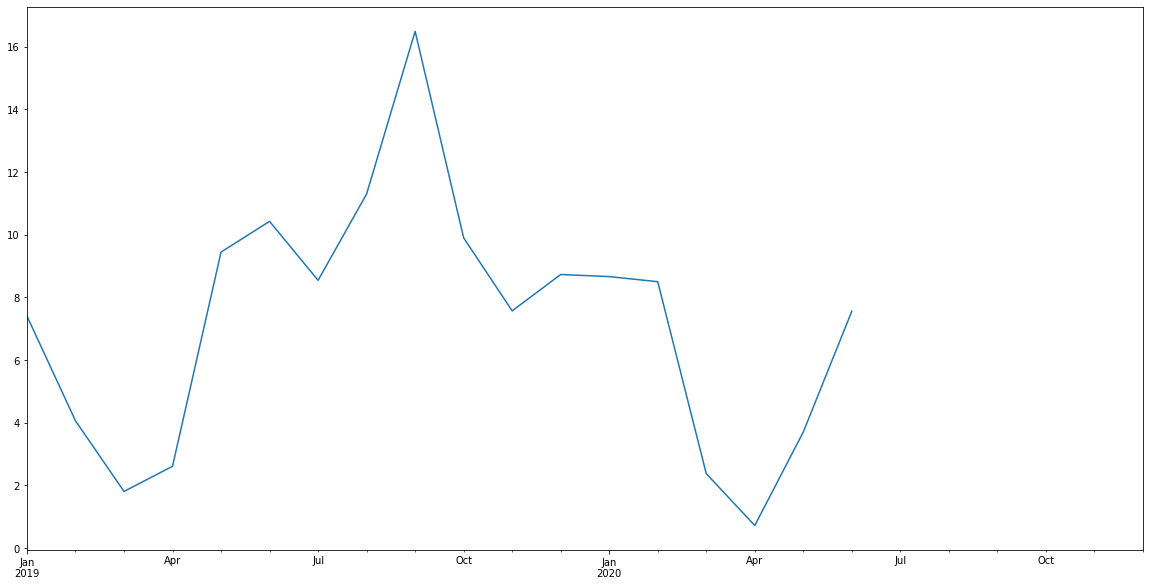

In [3]:
#---------------------------------------------------------------
# Select location fileA

dataA = dataA.set_index('Station')

dataA.columns = [pd.to_datetime(x[6:], format="%Y%m") for x in dataA.columns]

MMSL_A = dataA.loc['Majuro']
print(MMSL_A)

plt.figure(figsize=(20,10))
MMSL_A.plot()


Station
1979-01-01   NaN
1979-02-01   NaN
1979-03-01   NaN
1979-04-01   NaN
1979-05-01   NaN
              ..
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
2020-12-01   NaN
Name: Majuro, Length: 504, dtype: float64


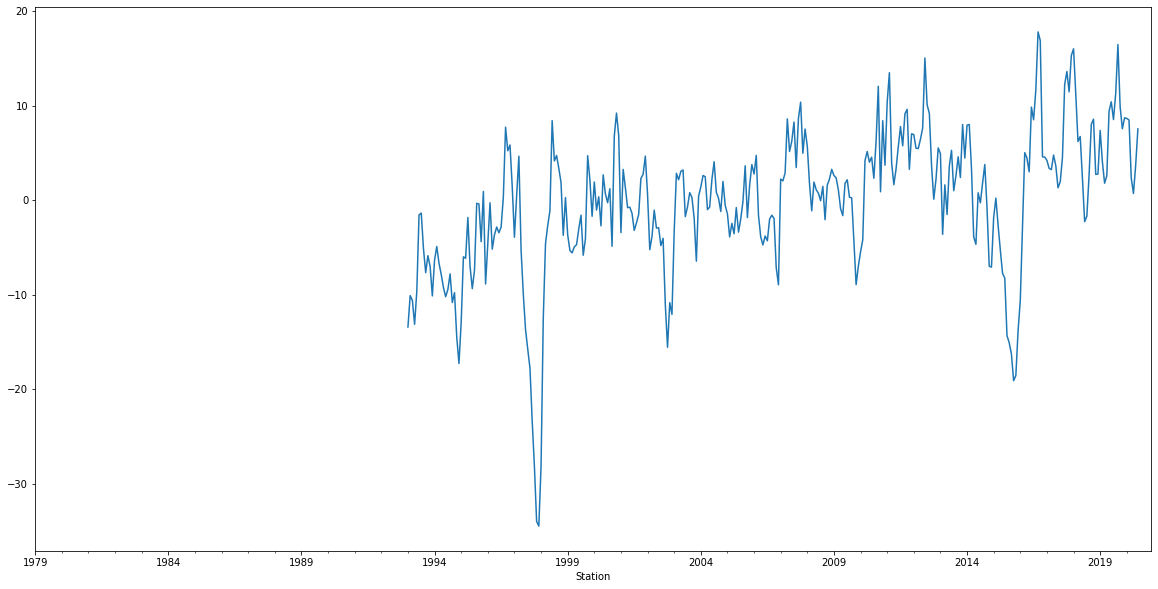

In [4]:
#---------------------------------------------------------------
# Select location fileB

dataB['Station'] = [pd.to_datetime(x[6:], format="%Y%m") for x in dataB['Station']]

dataB = dataB.set_index('Station')

MMSL_B = dataB['Majuro']

print(MMSL_B)

plt.figure(figsize=(20,10))
MMSL_B.plot()


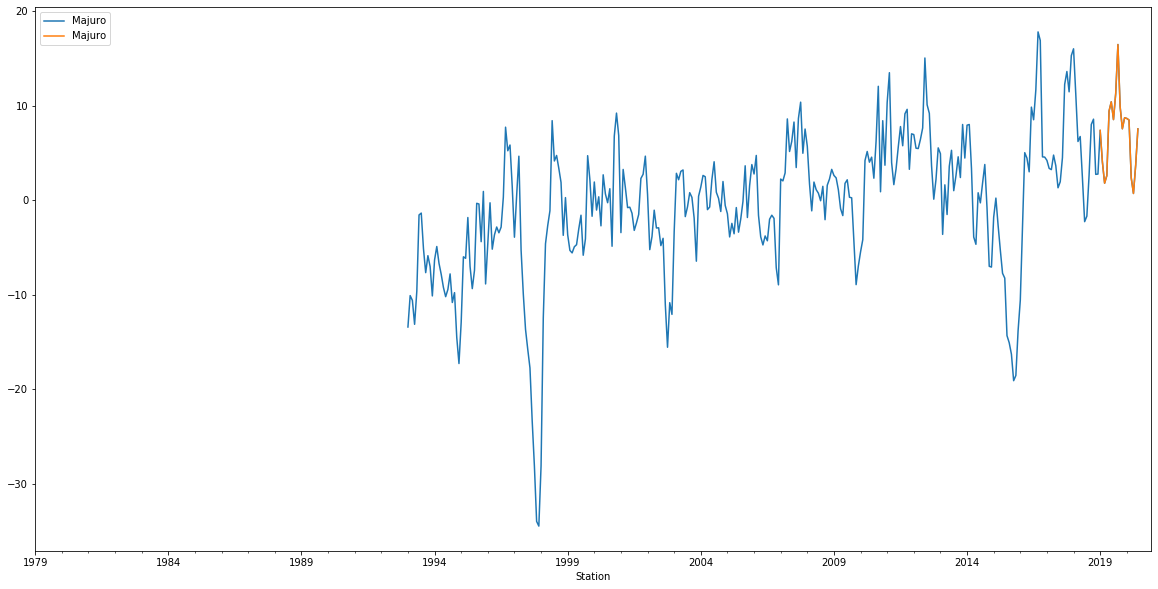

In [5]:
plt.figure(figsize=(20,10))
MMSL_B.plot()
MMSL_A.plot()
plt.legend()

In [6]:
#---------------------------------------------------------------
# MMSL from last available month

#MMSL_A = MMSL_A.dropna()
#MMSL_B = MMSL_B.dropna()


print(MMSL_A['2020-06-01':])
print()
print(MMSL_B['2020-06-01':])


2020-06-01    7.556499
2020-07-01         NaN
2020-08-01         NaN
2020-09-01         NaN
2020-10-01         NaN
2020-11-01         NaN
2020-12-01         NaN
Name: Majuro, dtype: float64

Station
2020-06-01    7.556499
2020-07-01         NaN
2020-08-01         NaN
2020-09-01         NaN
2020-10-01         NaN
2020-11-01         NaN
2020-12-01         NaN
Name: Majuro, dtype: float64


# MMSL from CFSv2 (https://www.cpc.ncep.noaa.gov/products/CFSv2/CFSv2_body.html)

<xarray.DataArray 'anom' (ENS: 1, TIME: 12, LEVEL: 1)>
array([[[-4.09    ],
        [-7.260002],
        [-4.616666],
        [ 2.502618],
        [ 3.558393],
        [-1.392471],
        [-0.590372],
        [ 1.422145],
        [ 2.620937],
        [ 3.570599],
        [ 1.892775],
        [-1.86868 ]]], dtype=float32)
Coordinates:
  * ENS      (ENS) int32 1
  * TIME     (TIME) datetime64[ns] 2020-05-01 2020-06-01 ... 2021-04-01
  * LEVEL    (LEVEL) int32 1
    LAT      float32 7.0
    LON      float32 171.0
Attributes:
    standard_name:      anomaly
    long_name:          NCEP CFSv2 forecast monthly anomaly
    time_average:       monthly
    climatoloy_period:  1999-2010
    variable_name:      sea surface height
    target_period:      Aug2020 - Apr2021
    initial_time:       20200626 - 20200705
    member:             40 forecast members ensemble mean
    note1:              T=1,2,3 are observations from CFSR
    note2:              T=4,5,...,12 are forecasts
    units:      

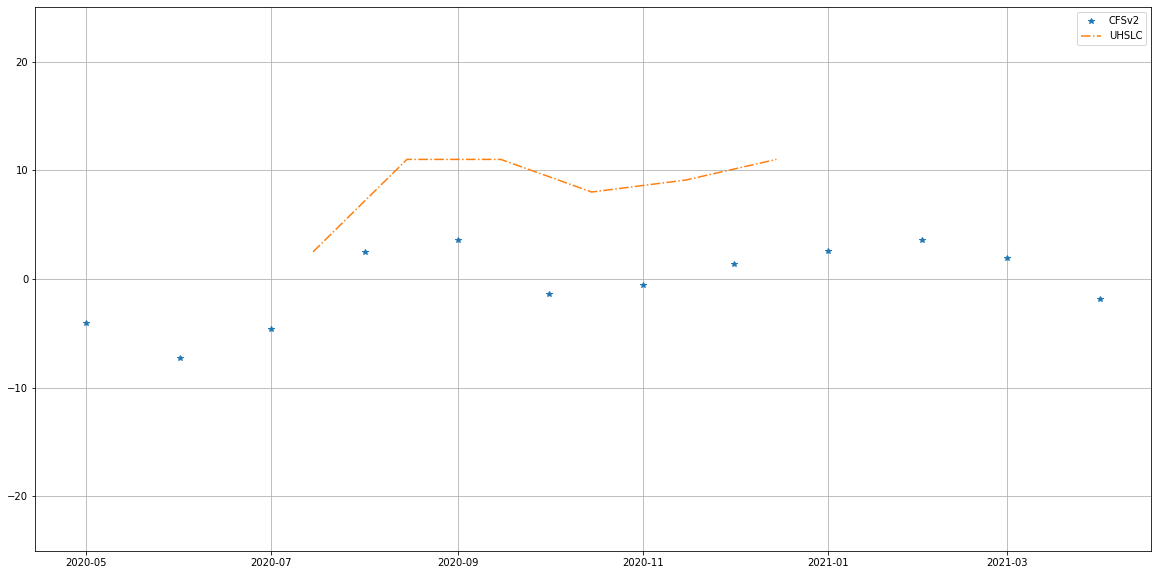

In [8]:
# CFSv2
kk = xr.open_dataset('glbSSHMon.nc')

site = kk.anom.sel(LON=171, LAT=7) # Majuro 
print(site)

plt.figure(figsize=(20,10))
plt.plot(site.TIME,site[0,:,0], '*', label='CFSv2')
plt.grid()


# UHSLC from wave page figure
import datetime 
date = [datetime.datetime(2020,7,15),datetime.datetime(2020,8,15),datetime.datetime(2020,9,15),datetime.datetime(2020,10,15),datetime.datetime(2020,11,15),datetime.datetime(2020,12,15)]
MMSL = [2.5, 11, 11, 8, 9.1, 11]# cm

plt.plot(date, MMSL, '-.', label='UHSLC')
plt.ylim(-25,25)
plt.legend()